In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
from datetime import datetime

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
# %matplotlib inline

liver_data = pd.read_csv('indian_liver_patient.csv')

In [2]:
# Success - Display the first record
display(liver_data.head(n=5))
# liver_data.head(n=5)
# print(datetime.now())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Number of records: 583
Number of patients likely to have liver disease 416
Number of patients unlikely to have liver disease 167
Percentage of patients likely to have liver disease 71.35506003430532%


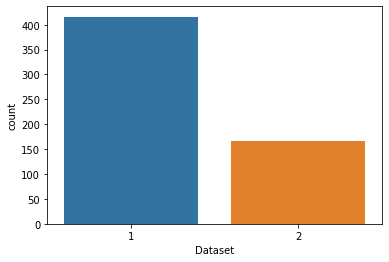

In [4]:
import seaborn as sns

n_records = len(liver_data.index)
n_records_liv_pos = len(liver_data[liver_data['Dataset'] == 1])
n_records_liv_neg = len(liver_data[liver_data['Dataset'] == 2])
percent_liver_disease_pos = (n_records_liv_pos/n_records)*100

print("Number of records: {}".format(n_records))
print("Number of patients likely to have liver disease {}".format(n_records_liv_pos))
print("Number of patients unlikely to have liver disease {}".format(n_records_liv_neg))
print("Percentage of patients likely to have liver disease {}%".format(percent_liver_disease_pos))

sns.countplot(data=liver_data, x = 'Dataset', label='Count')

In [5]:
# Split the data into features and target label
liver_data_labels = liver_data['Dataset']
# Drop label feature
liver_data_features = liver_data.drop(['Dataset'], axis=1)
# liver_data_features.head()

In [6]:
#Missing values
display(liver_data_features[liver_data_features['Albumin_and_Globulin_Ratio'].isnull()])

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN


In [7]:
# fill missing values with median value
liver_data_features.Albumin_and_Globulin_Ratio.fillna(liver_data_features['Albumin_and_Globulin_Ratio'].median(), inplace=True)

albumin_globulin_missing_indices = [209, 241, 253, 312]
liver_data_features.loc[albumin_globulin_missing_indices].head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,0.93
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,0.93
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,0.93
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,0.93


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f223690ec50>,
      dtype=object)

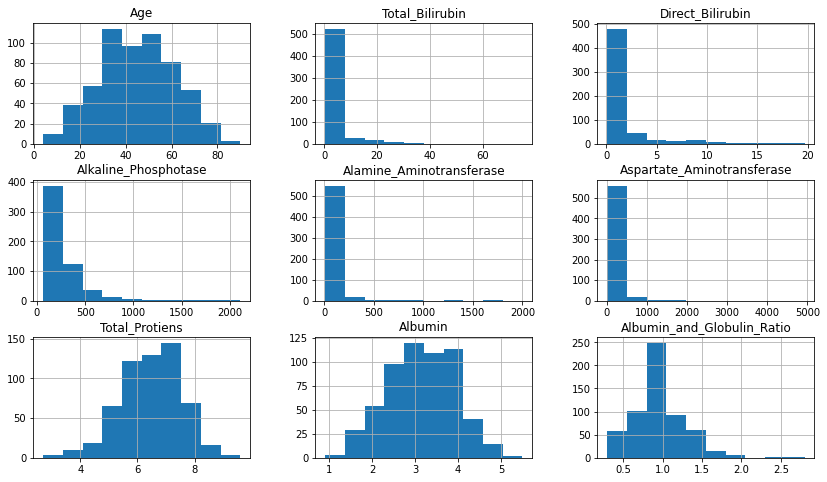

In [8]:
# plot features histogram
liver_data_features.hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22368d0ed0>,
      dtype=object)

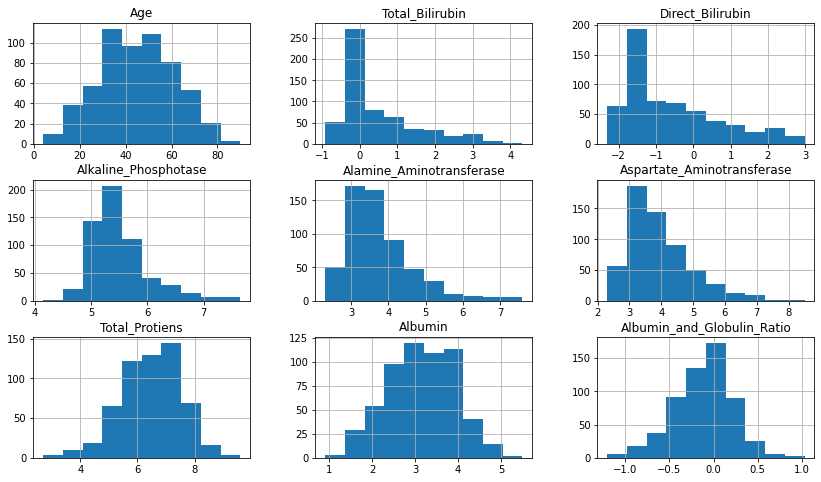

In [9]:
skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_transformed = pd.DataFrame(data = liver_data_features)
liver_data_features_log_transformed[skewed] = liver_data_features[skewed].apply(lambda x: np.log(x))

liver_data_features_log_transformed.hist(figsize=(14,8))

In [10]:
# liver_data_features_log_transformed.head()
liver_data_features_log_transformed.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.463421,-0.650373,5.493417,3.751829,3.956771,6.483190,3.141852,-0.111273
std,16.189833,1.018527,1.326394,0.528128,0.900236,0.997381,1.085451,0.795519,0.344530
min,4.000000,-0.916291,-2.302585,4.143135,2.302585,2.302585,2.700000,0.900000,-1.203973
25%,33.000000,-0.223144,-1.609438,5.167635,3.135494,3.218876,5.800000,2.600000,-0.356675
50%,45.000000,0.000000,-1.203973,5.337538,3.555348,3.737670,6.600000,3.100000,-0.072571
75%,58.000000,0.955511,0.262364,5.697093,4.102609,4.465908,7.200000,3.800000,0.095310
max,90.000000,4.317488,2.980619,7.654443,7.600902,8.502891,9.600000,5.500000,1.029619


In [11]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
             'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_minmax_transform = pd.DataFrame(data = liver_data_features_log_transformed)
liver_data_features_log_minmax_transform[numerical] = scaler.fit_transform(liver_data_features_log_transformed[numerical])

display(liver_data_features_log_minmax_transform.head(n = 5))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,Female,0.106924,0.000000,0.309849,0.088708,0.094800,0.594203,0.521739,0.491859
1,0.674419,Male,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222
2,0.674419,Male,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857
3,0.627907,Male,0.175072,0.262397,0.302130,0.063505,0.111792,0.594203,0.543478,0.539030
4,0.790698,Male,0.435110,0.567029,0.321779,0.187466,0.286268,0.666667,0.326087,0.128798


In [12]:
liver_data_features_final = pd.get_dummies(liver_data_features_log_minmax_transform, columns=['Gender'])
liver_data_features_final.head(n=3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,0.709302,0.106924,0.000000,0.309849,0.088708,0.094800,0.594203,0.521739,0.491859,1,0
1,0.674419,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222,0,1
2,0.674419,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857,0,1


In [13]:
#Assume naive predictor which always predicts liver disease
true_pos = n_records_liv_pos
false_pos = liver_data_labels.count() - true_pos
true_neg = 0
false_neg = 0
print('true positives: {} | true negatives: {}'.format(true_pos,false_pos))

# TODO: Calculate accuracy, precision and recall
accuracy = true_pos/liver_data_labels.count()
recall = true_pos/(true_pos + false_neg)
precision = true_pos/(true_pos + false_pos)
print('accuracy: {} | precision: {} | recall: {}'.format(accuracy, precision, recall))

# TODO: Calculate F-score using the formula above
beta = 2
fscore = (1 + beta * beta) * (precision * recall) / (beta * beta * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

true positives: 416 | true negatives: 167
accuracy: 0.7135506003430532 | precision: 0.7135506003430532 | recall: 1.0
Naive Predictor: [Accuracy score: 0.7136, F-score: 0.9257]


In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'disease prediction' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(liver_data_features_final, 
                                                    liver_data_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 24,
                                                    shuffle = True)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 466 samples.
Testing set has 117 samples.


In [15]:
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 150 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:150])
    end = time() # Get end time
    
    #  : Calculate the total prediction time
    results['pred_time'] = end-start
            
    #  : Compute accuracy on the first 150 training samples which is y_train[:150]
    results['acc_train'] = accuracy_score(y_train[:150], predictions_train)
        
    #  : Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #  : Compute F-score on the the first 150 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:150], predictions_train, beta=2)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print(results)
        
    # Return the results
    return results

In [16]:
from sklearn.linear_model import LogisticRegression

clf_bench = LogisticRegression(random_state=24)
sample_size = X_train.shape[0]
results_bench = {}

results_bench = train_predict(clf_bench, sample_size, X_train, y_train, X_test, y_test)

# print('Performance metrics for Logistic regression (additional benchmark)')
print('Accuracy score on training set: {} | Accuracy score on testing set: {} | F-score on training set: {} | F-score on test set: {}'.format(results_bench['acc_train'], results_bench['acc_test'], results_bench['f_train'], results_bench['f_test']))

LogisticRegression trained on 466 samples.
{'train_time': 0.02001214027404785, 'pred_time': 0.0018291473388671875, 'acc_train': 0.7066666666666667, 'acc_test': 0.6837606837606838, 'f_train': 0.9001782531194296, 'f_test': 0.8720930232558138}
Accuracy score on training set: 0.7066666666666667 | Accuracy score on testing set: 0.6837606837606838 | F-score on training set: 0.9001782531194296 | F-score on test set: 0.8720930232558138


In [17]:
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

# clf_A = SVC(random_state=24)
# clf_B = KNeighborsClassifier()
# clf_C = RandomForestClassifier(random_state=24)

# clf_all = [clf_A, clf_B, clf_C]
# # clf_all = [clf_A, clf_B, clf_C, clf_D, clf_E]

# # Calculate the number of samples for 20%, 50%, and 100% of the training data
# samples_100 = len(y_train)
# samples_50 = int(samples_100 * .5)
# samples_20 = int(samples_100 * .2)

# # Collect results on the learners
# results = {}
# for clf in clf_all:
#     clf_name = clf.__class__.__name__
#     results[clf_name] = {}
#     for i, samples in enumerate([samples_20, samples_50, samples_100]):
#         results[clf_name][i] = \
#         train_predict(clf, samples, X_train, y_train, X_test, y_test)

# # Run metrics visualization for the three supervised learning models chosen
# vs.evaluate(results, accuracy, fscore)

In [18]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import SGDClassifier

clf_D = LinearSVC(random_state=24)
clf_E = DecisionTreeClassifier(random_state=24)
clf_F = AdaBoostClassifier(random_state=24)
# clf_G = GaussianNB()
# clf_H = SGDClassifier(random_state=24)

clf_more = [clf_D, clf_E, clf_F]

more_results = {}
for clf in clf_more:
    clf_name = clf.__class__.__name__
    more_results[clf_name] = {}
    for i, samples in enumerate([samples_20, samples_50, samples_100]):
        more_results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
vs.evaluate(more_results, accuracy, fscore)

NameError: ignored

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score
from datetime import datetime

clf = SVC(random_state=24)

kernel_options = ['linear', 'poly', 'rbf']
c_param_options = [0.01, 0.1, 1, 10]
gamma_param_options = [0.001, 0.01, 0.1, 1]

parameters = {'C': c_param_options, 'kernel': kernel_options, 'gamma': gamma_param_options}
# print(parameters)

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)
# print(scorer)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, n_jobs=-1, verbose=1, cv=5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
# print(X_train.shape, y_train.shape)
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
# print(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# # Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

best_params = grid_fit.best_params_
best_score = grid_fit.best_score_
cv_results = grid_fit.cv_results_

print("Best parameters: {}".format(best_params))
print("Best score: {}".format(best_score))
# print("CV results: {}".format(cv_results))
# print(datetime.now())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Unoptimized model
------
Accuracy score on testing data: 0.6923
F-score on testing data: 0.9184

Optimized Model
------
Final accuracy score on the testing data: 0.6923
Final F-score on the testing data: 0.9184
Best parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best score: 0.927465144396321


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.1s finished


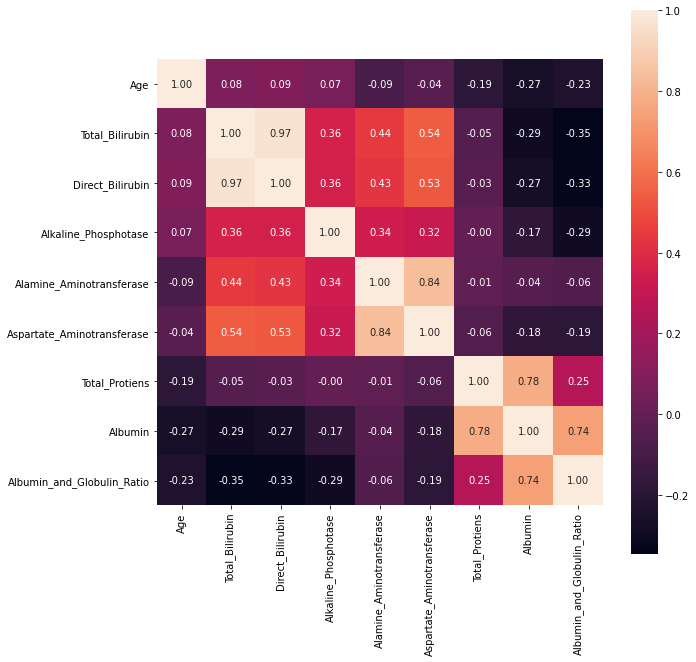

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# calculate correlation coefficients for the dataset
correlations = liver_data_features.corr()

# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


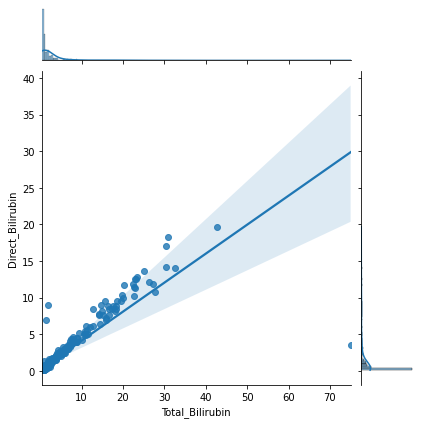

In [21]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_data, kind="reg")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


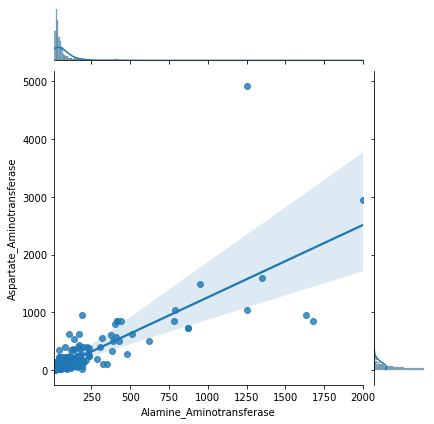

In [22]:
sns.jointplot("Alamine_Aminotransferase", "Aspartate_Aminotransferase", data=liver_data, kind="reg" )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


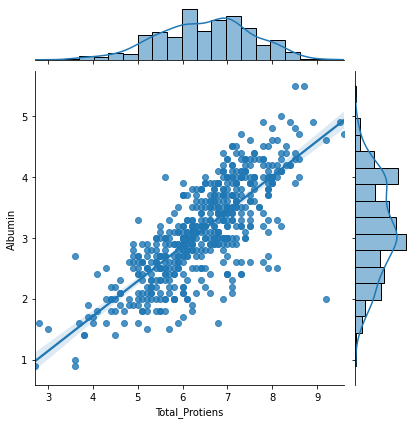

In [23]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_data, kind="reg")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


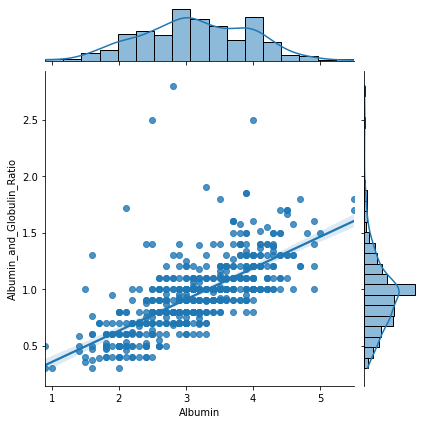

In [24]:
sns.jointplot("Albumin", "Albumin_and_Globulin_Ratio", data=liver_data, kind="reg")  

Based on the correlation plots, the following pairs of features seem to be related:
- Total_Bilirubin & Direct_Bilirubin
- Alamine_Aminotransferase & Aspartate_Aminotransferase
- Total_Protiens & Albumin
- Albumin & Albumin_and_Globulin_Ratio

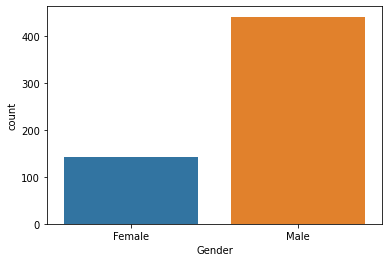

In [25]:
sns.countplot(data=liver_data, x = 'Gender', label='Count')